# Notes to self:
Variables:
* Unprocessed or denoised
* Length of STFT window
* First second of all data or first sample or random second or all samples

In [68]:
# Setup
import librosa
import os
%matplotlib inline
import matplotlib.pyplot as plt


def firstSecond(wav_names, prefix):
    """Grabs the first second of the first wav file."""
    w = next(wav_names)
    path = os.path.join(prefix, w)
    sample, sampling_rate = librosa.load(path)
    segment = sample[:sampling_rate]    # Grab a 1s segment
    return segment, sampling_rate

def firstSample(wav_names, prefix):
    """Grabs all of the first sample."""
    w = next(wav_names)
    path = os.path.join(prefix, w)
    return librosa.load(path)

notHidden = lambda x: not x.startswith('.')
def visualize(visFun, choiceFun=firstSecond, data_dir='../data'):
    classes = filter(notHidden, os.listdir(data_dir)) 
    for c in classes:
        wavs = filter(notHidden, os.listdir(data_dir + '/' + c))
        segment, sampling_rate = choiceFun(wavs, os.path.join(data_dir, c))
        visFun(c, segment, sampling_rate)



In [ ]:
# Noise suppression



In [69]:
from IPython.display import Audio
from IPython.display import display

def playAudio(label, segment, sampling_rate):
    print(label)
    display(Audio(segment, rate=sampling_rate, autoplay=False))

visualize(playAudio)

Seiko^^^Model_5^^^Movement_4R36^^^21600^^^41hrs^^^SN00006


Seiko^^^Model_5^^^Movement_4R36^^^21600^^^41hrs^^^SN00005


Omega^^^SeaMaster_Black^^^Movement_1128^^^28800^^44hrs^^^SN00001


Tissot^^^Seastar_Powermatic_80^^^PM80^^^21600^^^80hrs^^^SN00007


Rado^^^Open_Dial^^^Movement_PM80^^^21600^^^800hrs^^^SN00003


Rolex^^^Exploer_2^^^Movement_3187^^^21600^^^48hrs^^^SN00004


Omega^^^SeaMaster_White^^^Movement_1128^^^28800^^44hrs^^^SN00002


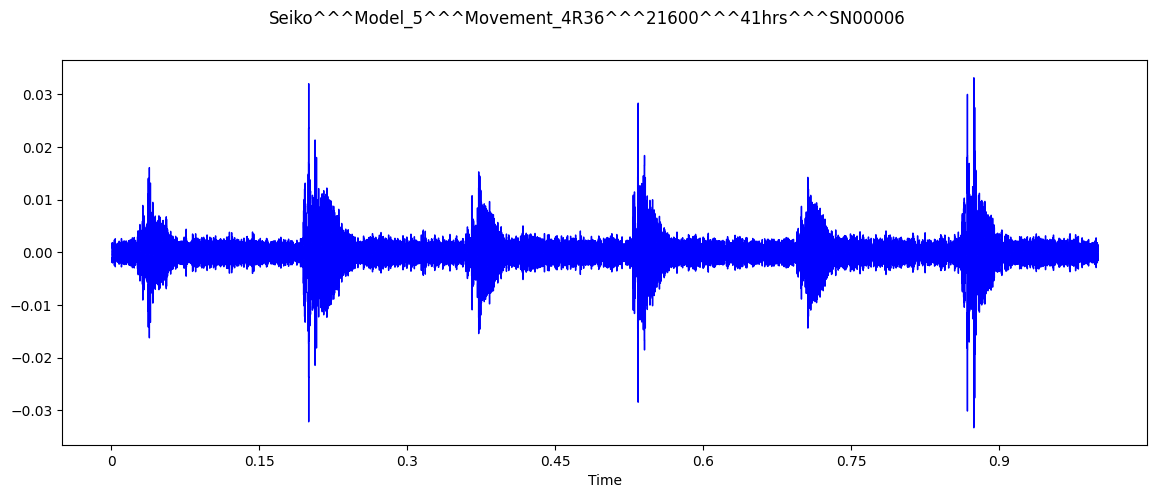

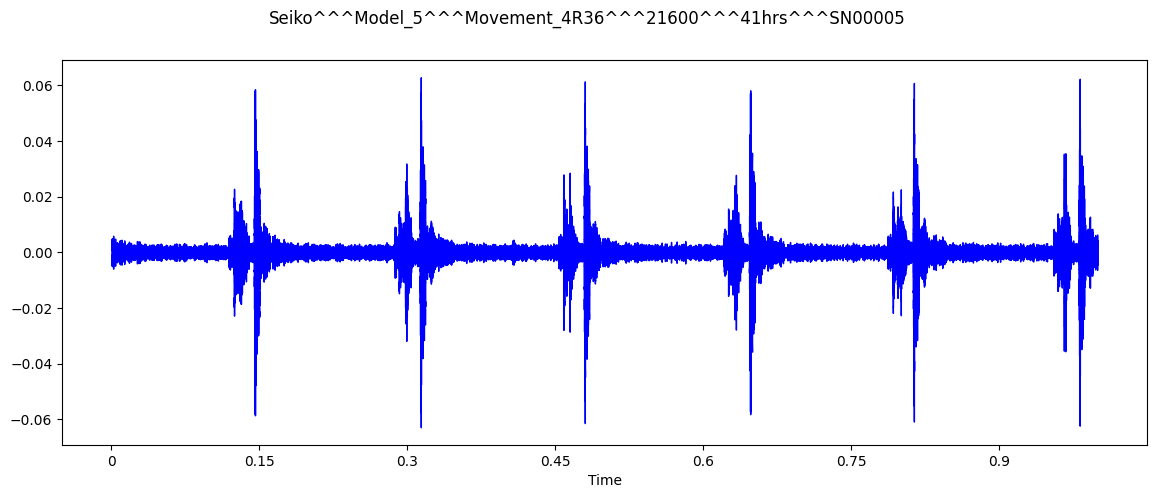

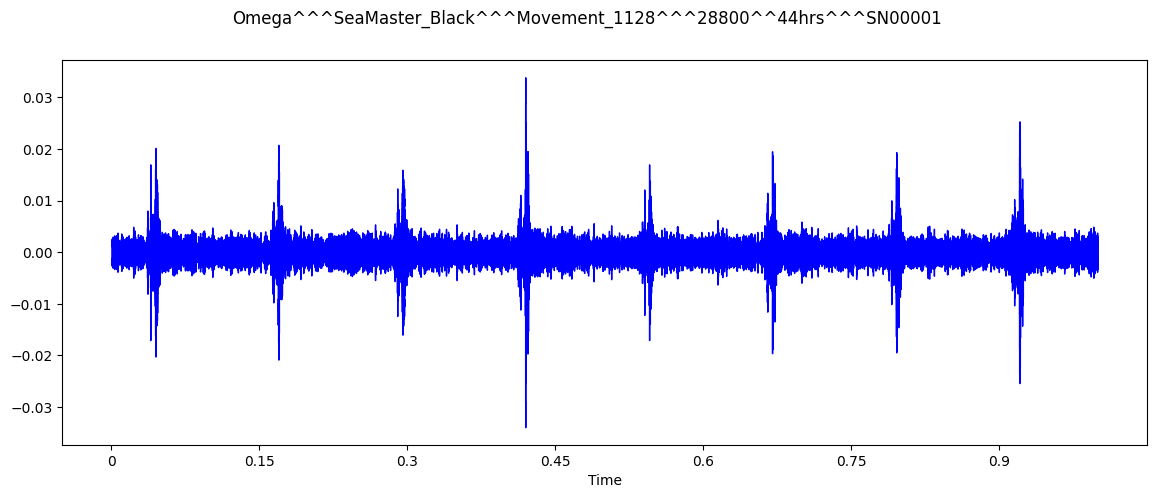

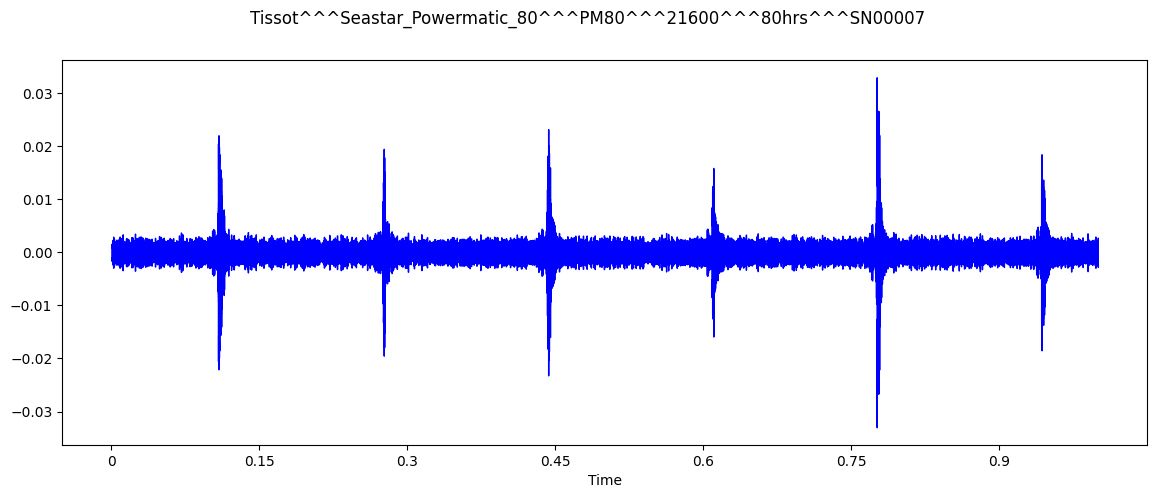

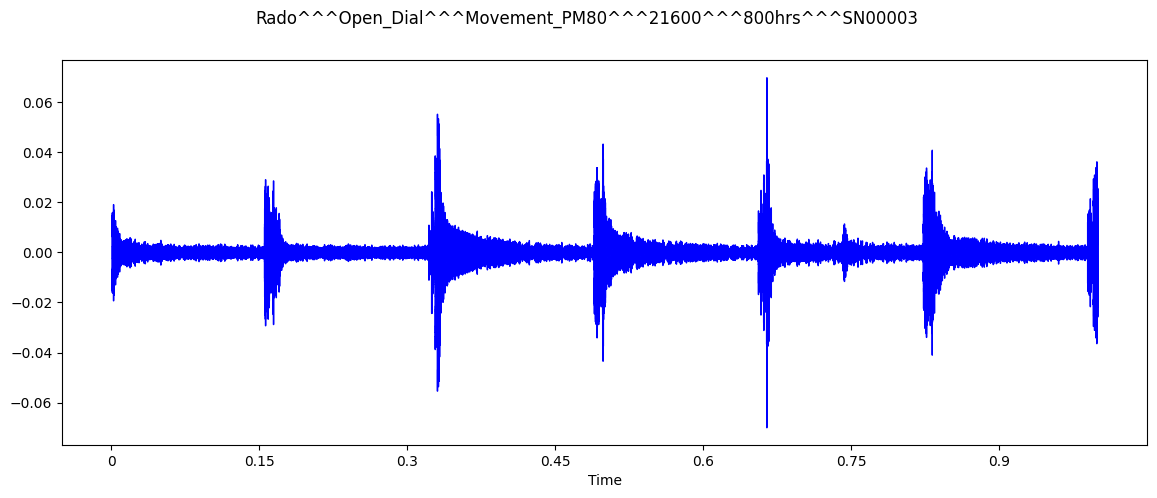

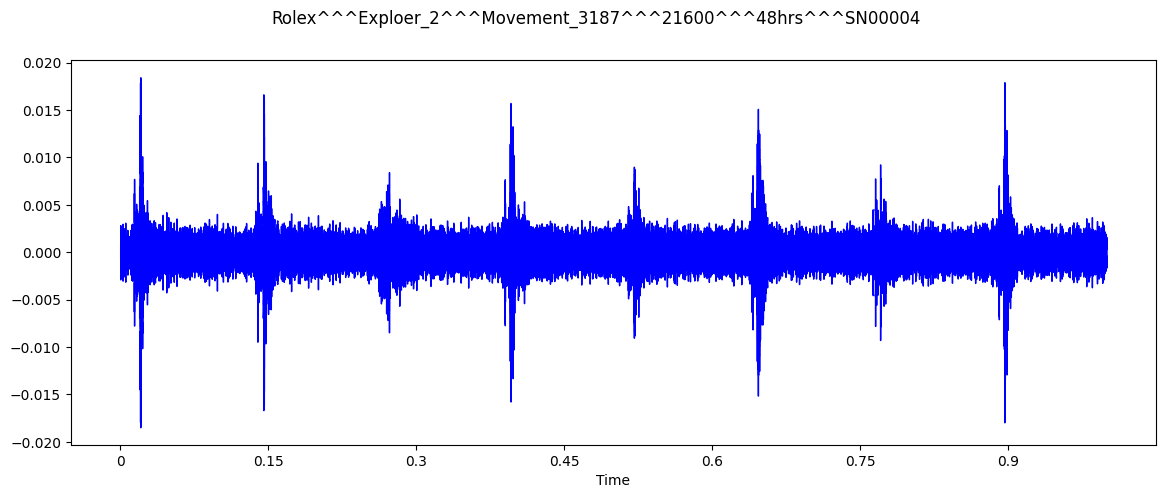

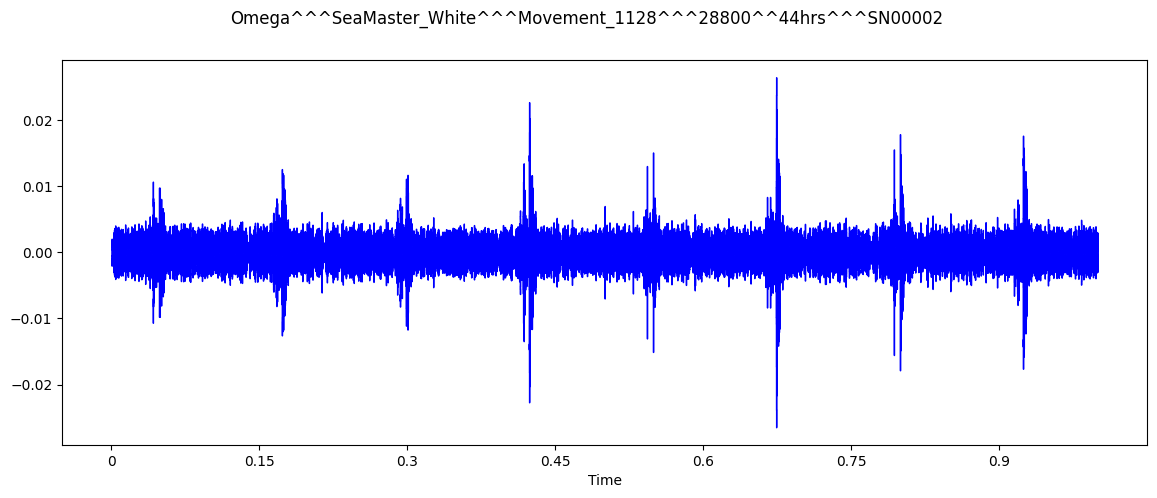

In [70]:
def plotAmplitude(label, segment, sampling_rate):
    fig = plt.figure(figsize=(14,5))
    librosa.display.waveshow(segment, sr=sampling_rate, color='blue')
    fig.suptitle(label)

visualize(plotAmplitude)

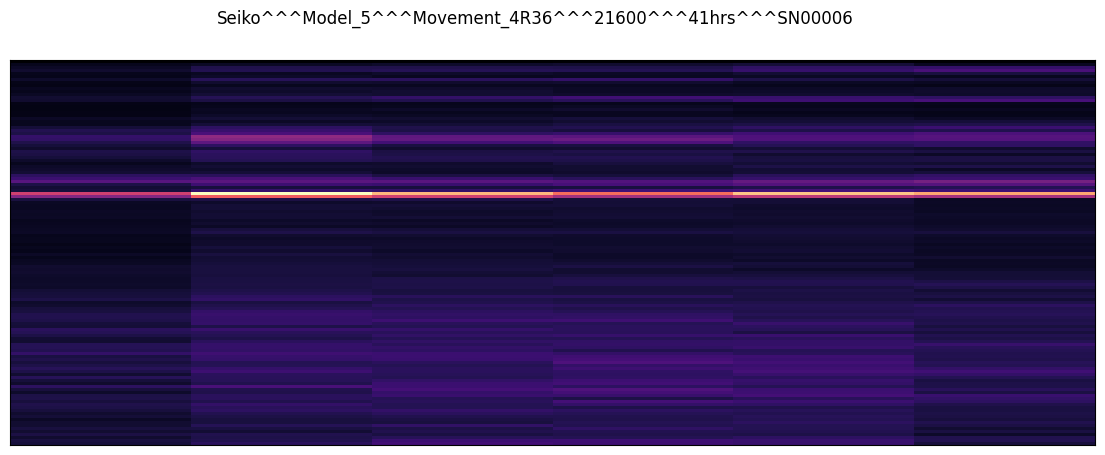

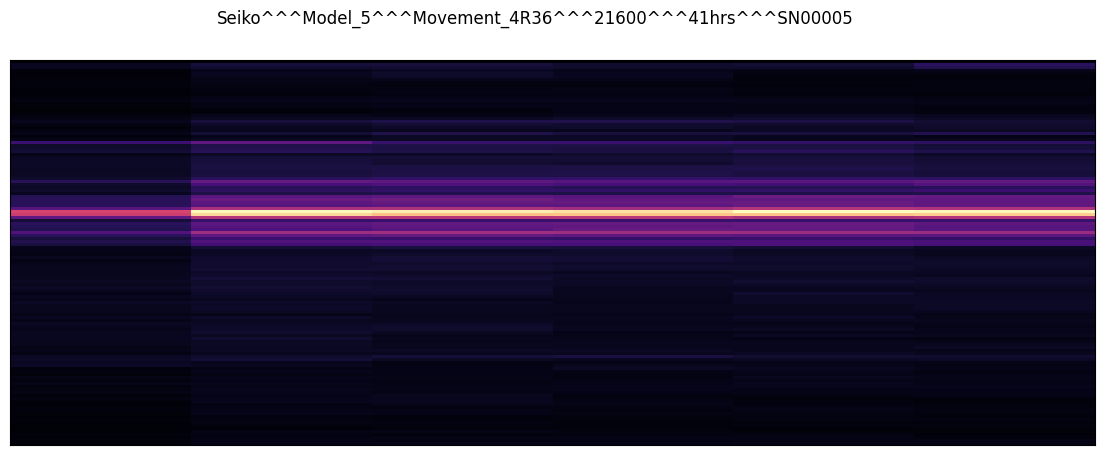

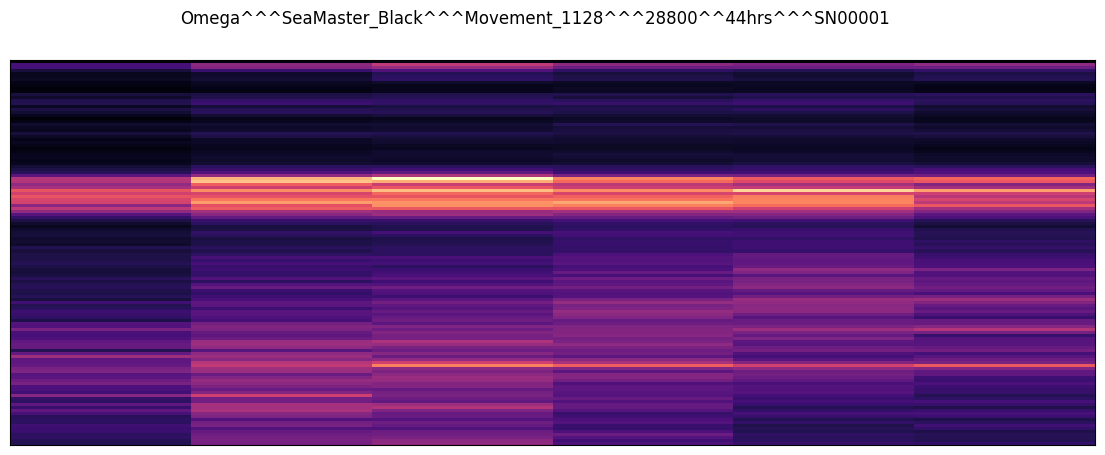

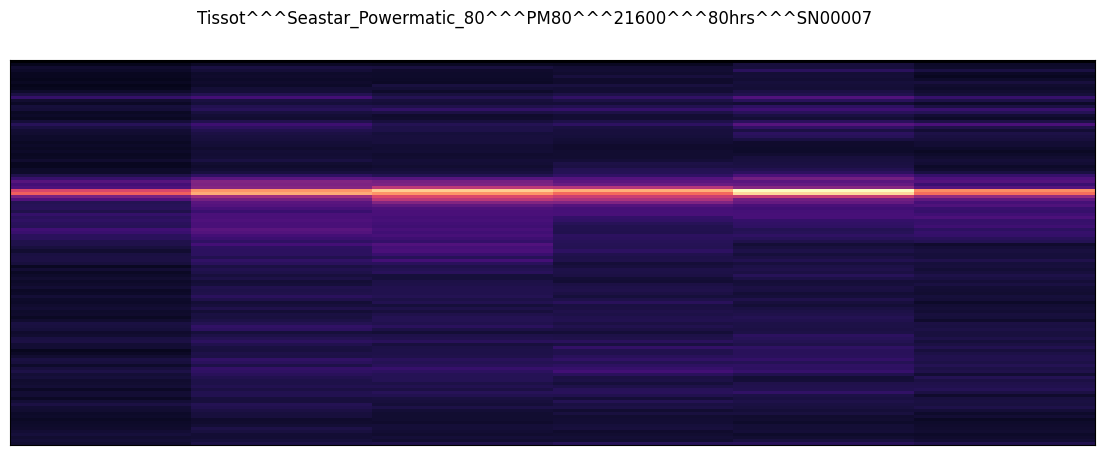

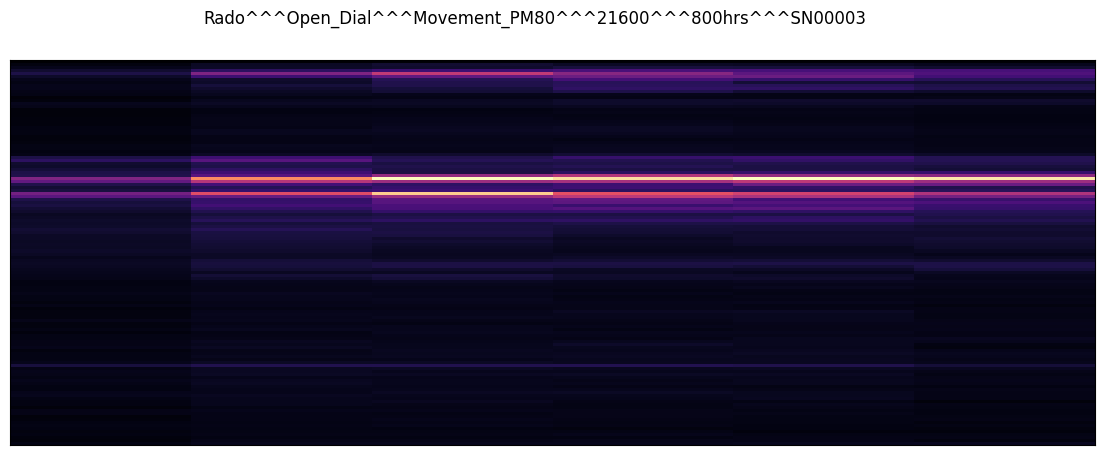

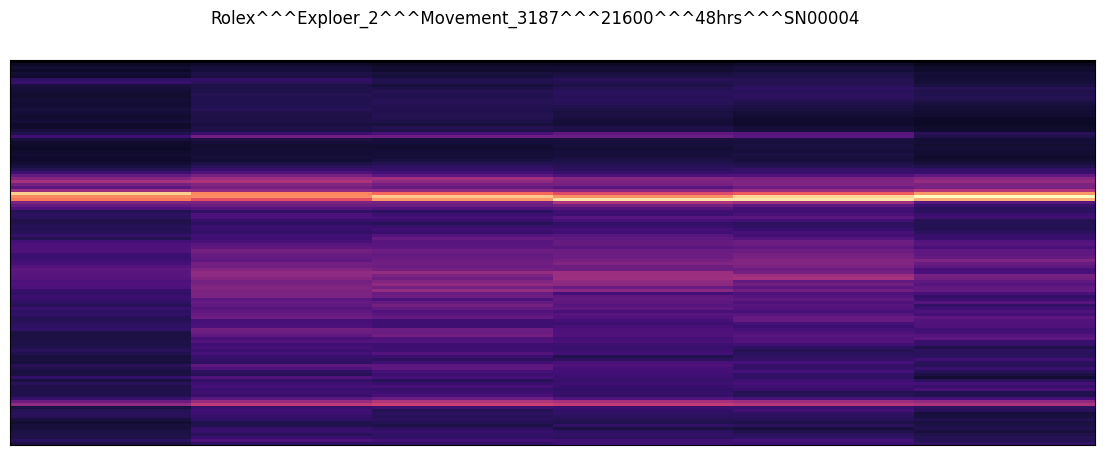

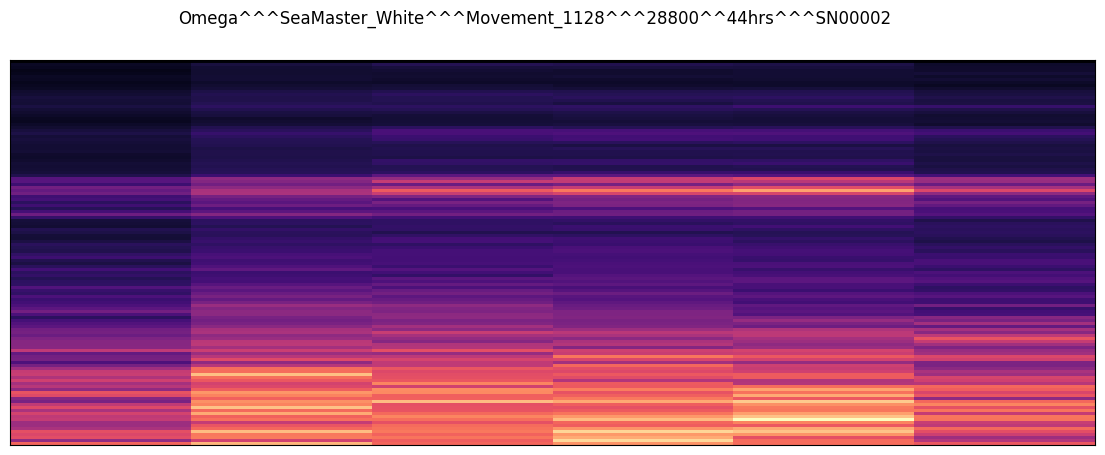

In [71]:
def viewSpectrogram(label, segment, sampling_rate):
    sgram = librosa.stft(segment, n_fft=16384)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sampling_rate)

    fig = plt.figure(figsize=(14,5))
    librosa.display.specshow(mel_sgram)
    fig.suptitle(label)

visualize(viewSpectrogram)

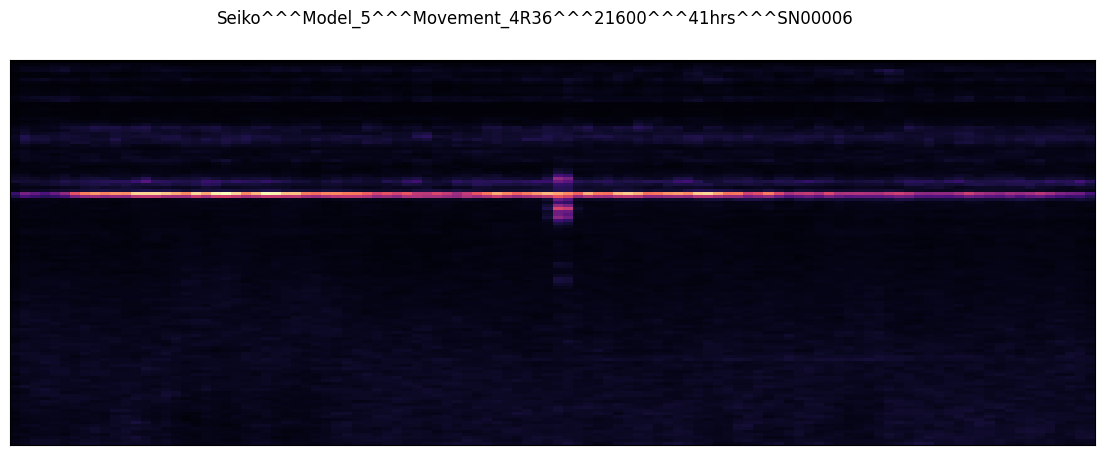

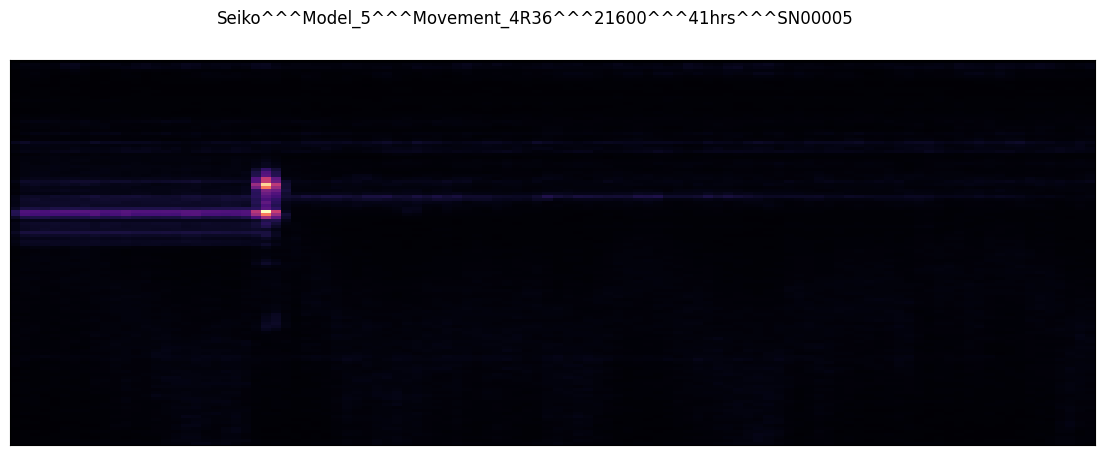

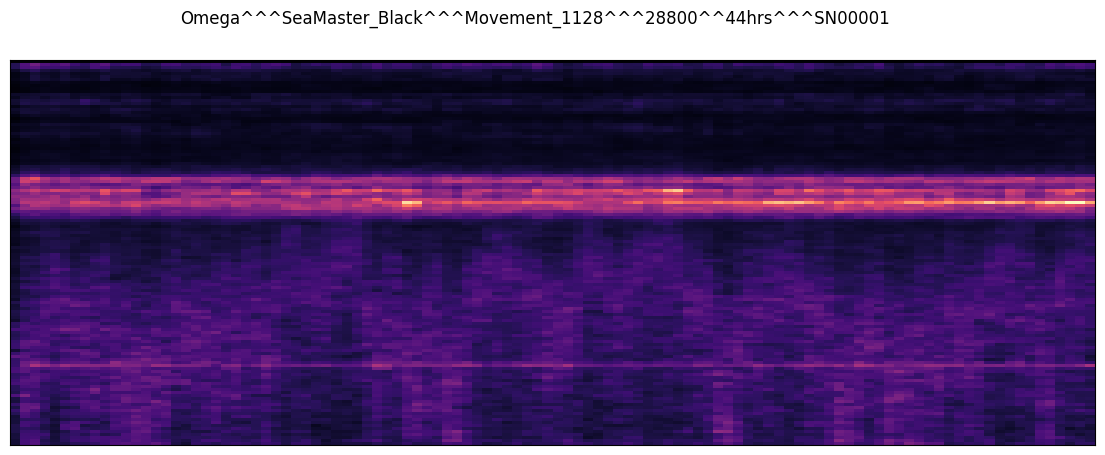

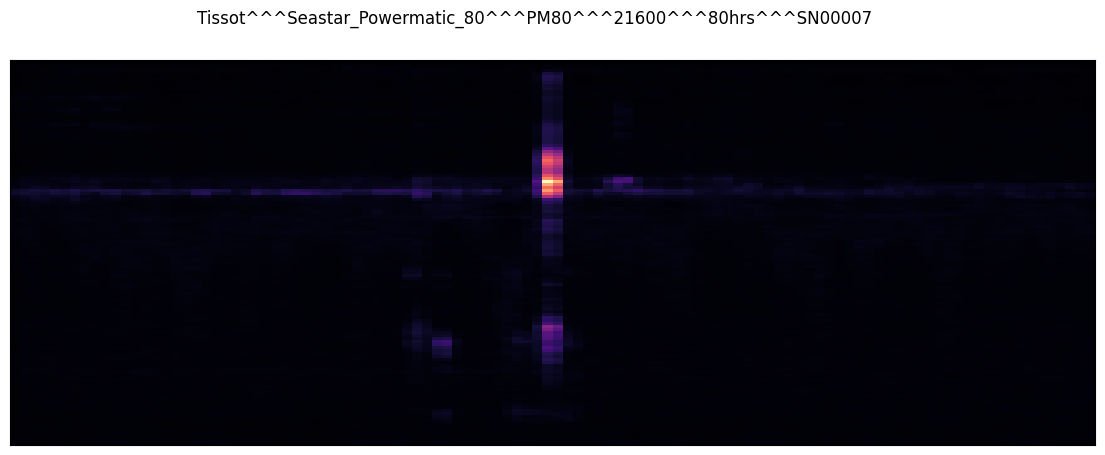

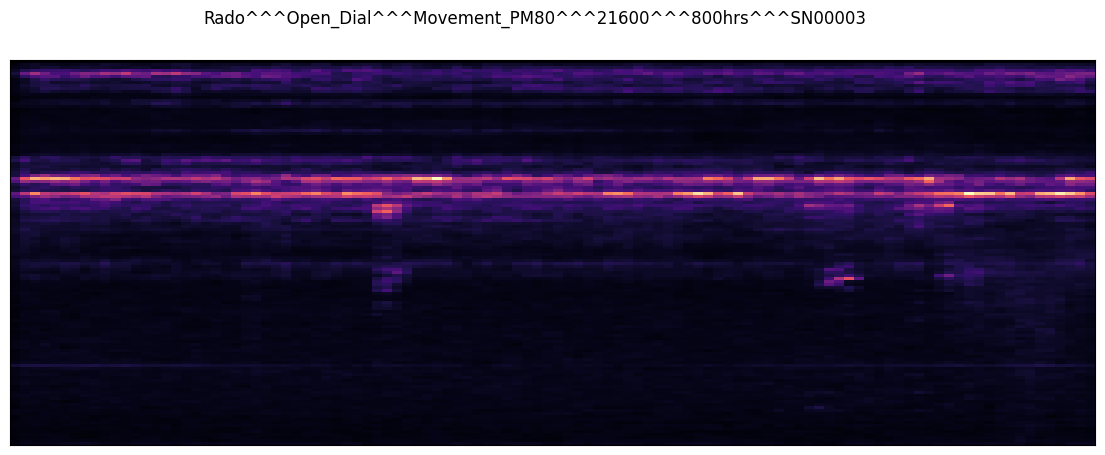

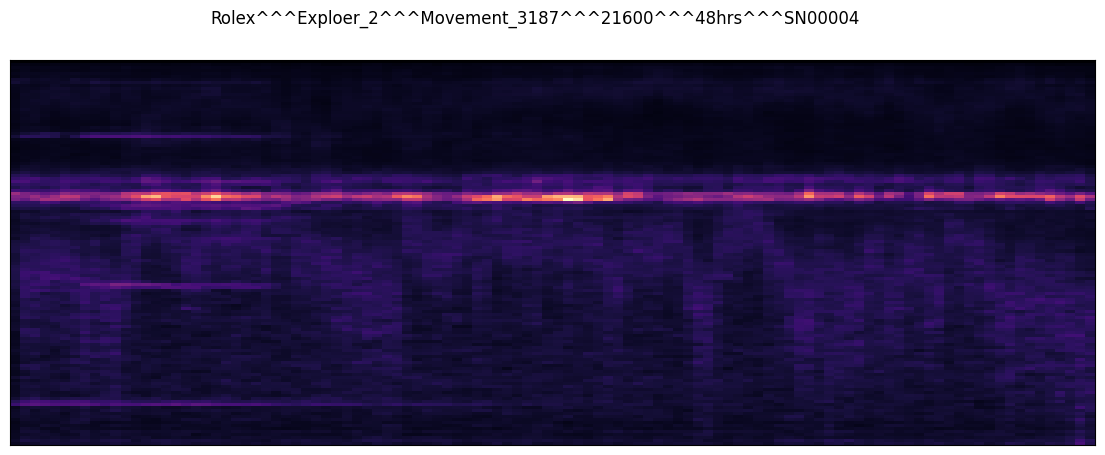

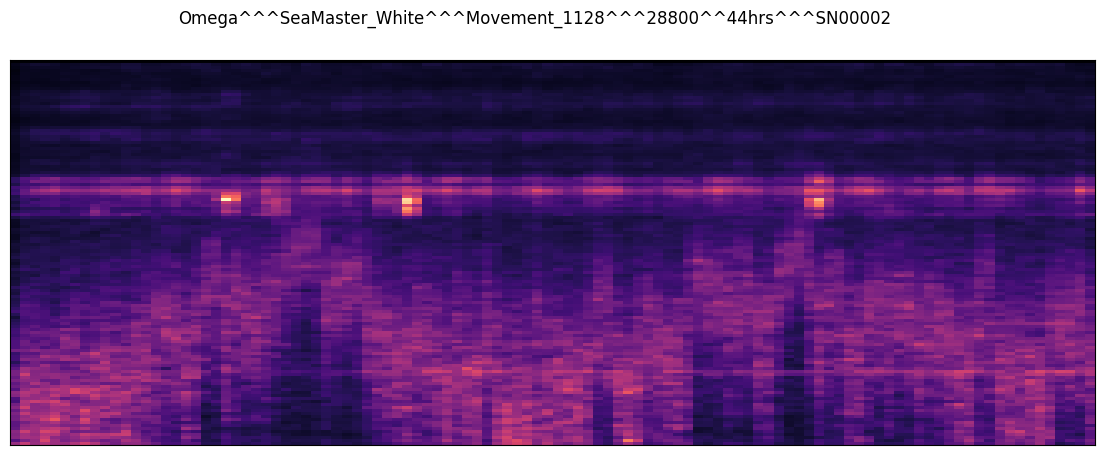

In [72]:
visualize(viewSpectrogram, choiceFun=firstSample)